### Name:       Ghulam Mustafa
### Roll:       FA22-BSCS-188
### Section:    E
____________________________________
# ASSIGNMENT:  DATA PRE-PROCESSING
# AI LAB

_________

## SALARY DATASET PRE PROCESSING

_______

        Imports

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

        Data Import

In [23]:
data = pd.read_csv('salary_data.csv')

In [24]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [25]:
data.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [26]:
data.shape

(375, 6)

_____________________

### HANDLING MISSING DATA

 We are gonna fill all columns with missing values, with mode and median values

In [27]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Years of Experience'].fillna(data['Years of Experience'].median(), inplace=True)
data['Salary'].fillna(data['Salary'].median(), inplace=True)
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Education Level'].fillna(data['Education Level'].mode()[0], inplace=True)
data['Job Title'].fillna(data['Job Title'].mode()[0], inplace=True)

/tmp/ipykernel_25694/3960406373.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
/tmp/ipykernel_25694/3960406373.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

check if any left

In [28]:
print(data.isnull().sum())

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


        Remove Duplicates

In [29]:
data.drop_duplicates(inplace=True)

____

### DATA ENCODING TO NUMERIC

In [30]:
print(data['Gender'].unique())

['Male' 'Female']


In [31]:
data['Gender'] = data['Gender'].map({'Male': 1,'Female': 0})

In [32]:
print(data['Education Level'].unique())

["Bachelor's" "Master's" 'PhD']


In [33]:
data['Education Level'] = data['Education Level'].map({"Bachelor's": 0, "Master's": 1, "PhD": 2})

In [34]:
print(data['Job Title'].unique())

['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Network Engineer' 'Administrative Assistant'
 'Strategy Consultant' 'Copywriter' 'Account Manager'
 'Director of Marketing' 'Help Desk Analyst' 'Customer Service Manager'
 'Business Intelligence Analyst' 'Event Coordinator' 'VP of Finance'
 'G

###     Hmmm tooo many Job Titles  , i think we need help from Label Encoder

In [35]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [36]:
data['Job Title'] = le.fit_transform(data['Job Title'])

In [37]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0


_____________

## TEST - TRAIN SPLIT

In [38]:
X = data.drop('Salary', axis=1)
y = data['Salary']

In [39]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [40]:
print("X_train Shape:  ", X_train.shape)
print("y_train Shape:  ", y_train.shape)
print("X_test Shape:  ", X_test.shape)
print("y_test Shape:  ", y_test.shape)

X_train Shape:   (227, 5)
y_train Shape:   (227,)
X_test Shape:   (98, 5)
y_test Shape:   (98,)


_______________

## PLOTTING GRAPHS

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

### Histogram Distribution of Salary

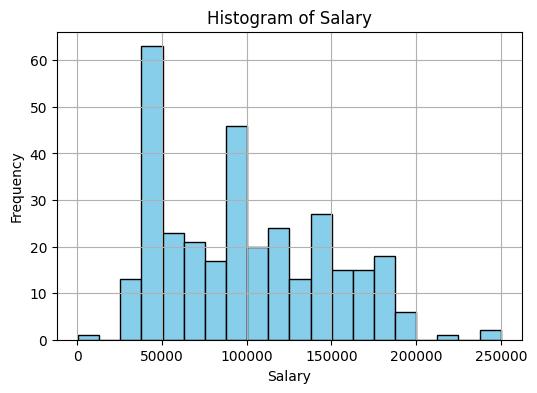

In [42]:
plt.figure(figsize=(6, 4))
plt.hist(data['Salary'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Line Plot of Salary over Index

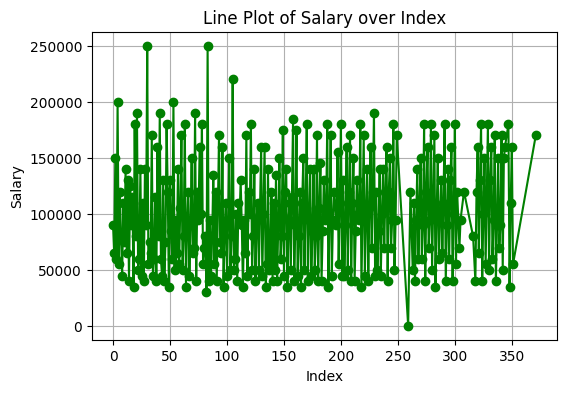

In [43]:
plt.figure(figsize=(6, 4))
plt.plot(data.index, data['Salary'], marker='o', linestyle='-', color='green')
plt.title('Line Plot of Salary over Index')
plt.xlabel('Index')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

### Box Plot of Salary by Education Level

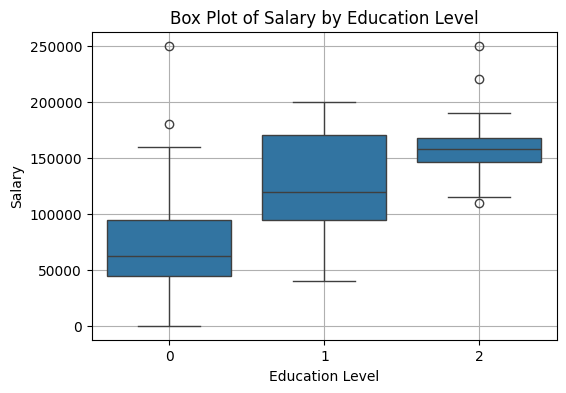

In [44]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Education Level', y='Salary', data=data)
plt.title('Box Plot of Salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

### Scatter Plot Age vs Salary

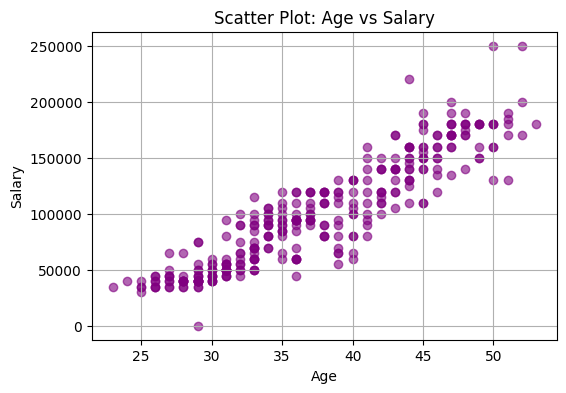

In [45]:
plt.figure(figsize=(6, 4))
plt.scatter(data['Age'], data['Salary'], alpha=0.6, color='purple')
plt.title('Scatter Plot: Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

### Bar Plot: Average Salary by Gender

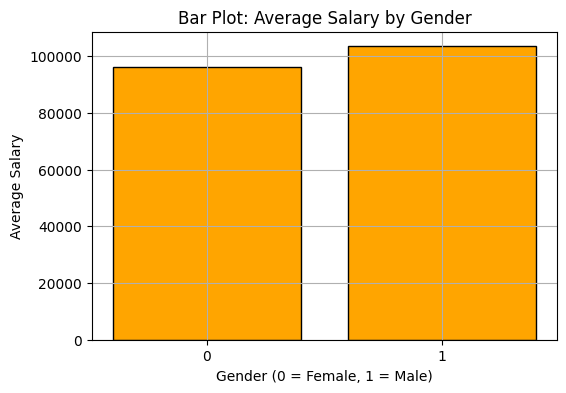

In [46]:
avg_salary_by_gender = data.groupby('Gender')['Salary'].mean()
plt.figure(figsize=(6, 4))
plt.bar(avg_salary_by_gender.index.astype(str), avg_salary_by_gender.values, color='orange', edgecolor='black')
plt.title('Bar Plot: Average Salary by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Average Salary')
plt.grid(True)
plt.show()

### Heatmap of Feature Correlations

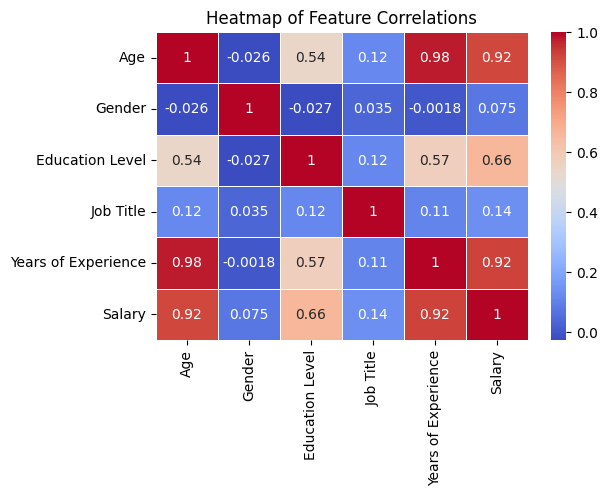

In [47]:
plt.figure(figsize=(6, 4))
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()